+------------------------+--------------------+--------------------+--------------------+------------------------+
| Distance to Goal(feet) |      % Scored      |      % Saved       |       %Wide        |     % Over the Bar     |
+------------------------+--------------------+--------------------+--------------------+------------------------+
|           3            | 36.014245916579945 | 61.70709688817645  | 2.2784417397599395 | 0.00021545548366524252 |
|           6            |  72.9827058829161  | 24.41837130340871  | 2.598002267489365  | 0.0009205461858273446  |
|           9            |  81.6646484120202  | 14.955887256949444 | 2.963037179371019  |  0.41642715165933614   |
|           12           | 82.83144926230511  | 11.002156663844003 | 3.3738011649579387 |   2.7925929088929444   |
|           15           | 81.17260032215425  | 8.917934357117126  | 3.8320240898004774 |   6.077441230928148    |
|           18           | 77.97194549873961  | 8.904784421029373  | 4.392502203

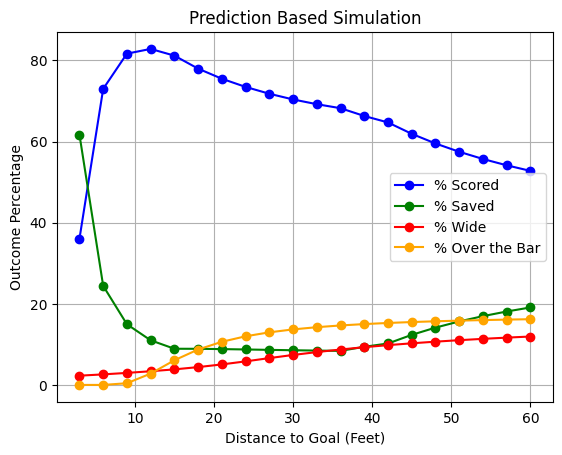

In [1]:
import math
from sympy import symbols, Eq, solve
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

resultsgoalx = []
resultsgoaly = []
resultsmissx = []
resultsmissy = []
pointsout = []
shotx = []
shoty = []
wideshotx = []
wideshoty = []
keeperx = []
keepery = []
numwide = []
numover = []
numscore = []
numsave = []
percentscore = []
percentsave = []
percentwide = []
percentover = []




distances = range(3, 63, 3)
shots = range(1,101)
results = []


def calculate_goal_angle(distance, goal_width=24):
    half_angle = math.atan((goal_width / 2) / distance)
    full_angle = 2 * half_angle
    return math.degrees(full_angle)

def calculate_goal_angley(distance, goal_height=24):
    height = math.atan((goal_height) / distance)
    return math.degrees(height)

for d in distances:
#d=36
#xpoints
  angle = calculate_goal_angle(d)
  angley = calculate_goal_angley(d)

  quart1_angle = math.degrees(math.atan(6/d))
  quart2_angle = (angle/2)-quart1_angle

#ypoints
  lowquart1_angle = math.degrees(math.atan(4/d))
  newdist1y= math.sqrt((d**2) + (4**2))
  highquart1_angle = math.degrees(math.atan(4/newdist1y))

  newdist1x = math.sqrt((d**2) + (6**2))
  lowquart2_angle = math.degrees(math.atan(4/newdist1x))
  newdist2y = math.sqrt(newdist1x**2 + (4**2))
  highquart2_angle = math.degrees(math.atan(4/newdist2y))

  newdist2x = math.sqrt(newdist1x**2 + (6**2))
  lowquart3_angle = math.degrees(math.atan(4/newdist2x))
  newdist3y = math.sqrt(newdist2x**2 + (4**2))
  highquart3_angle = math.degrees(math.atan(4/newdist3y))

  numruns = range(1,10001)


  for j in numruns:
    for i in shots:
    #shot
      anglex = random.uniform(0,angle) + random.randint(-2*d,2*d)
      angley = random.uniform(0,angley) + random.randint(0,2*d)
      midx = angle/2


      q1 = quart2_angle
      q2 = midx - q1
      q3 = midx + quart1_angle
      q4 = midx + quart1_angle + quart2_angle


      if q2 < anglex < midx:
        if angley < lowquart2_angle:
          shotx.append(random.uniform(6,12))
          shoty.append(random.uniform(0,4))
      if midx < anglex < q3:
        if angley < lowquart2_angle:
          shotx.append(random.uniform(12,18))
          shoty.append(random.uniform(0,4))
      if q1 < anglex < q2:
        if angley < lowquart2_angle:
          shotx.append(random.uniform(0,6))
          shoty.append(random.uniform(0,4))
      if q3< anglex < q4:
        if angley < lowquart2_angle:
          shotx.append(random.uniform(18,24))
          shoty.append(random.uniform(0,4))

      if q2 < anglex < midx:
        if lowquart2_angle < angley < (lowquart2_angle+highquart2_angle):
          shotx.append(random.uniform(6,12))
          shoty.append(random.uniform(4,8))
      if midx < anglex < q3:
        if lowquart2_angle < angley < (lowquart2_angle+highquart2_angle):
          shotx.append(random.uniform(12,18))
          shoty.append(random.uniform(4,8))
      if q1 < anglex < q2:
        if lowquart2_angle < angley < (lowquart2_angle+highquart2_angle):
          shotx.append(random.uniform(0,6))
          shoty.append(random.uniform(4,8))
      if q3< anglex < q4:
        if lowquart2_angle < angley < (lowquart2_angle+highquart2_angle):
          shotx.append(random.uniform(18,24))
          shoty.append(random.uniform(4,8))

      if angley > (lowquart2_angle+highquart2_angle):
        wideshoty.append(random.uniform(8,9))
        wideshotx.append(random.uniform(0,24))
        numover.append(1)


      if anglex > angle:
        wideshotx.append(random.uniform(24,25))
        wideshoty.append(random.uniform(0,8))
        numwide.append(1)

      if anglex < 0:
        wideshotx.append(random.uniform(-1,0))
        wideshoty.append(random.uniform(0,8))
        numwide.append(1)



  #Keeper
      spotsx = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
      decisionx = random.choice(spotsx)
      spotsy = [1,2,3,4,5,6,7,8]
      decisiony = random.choice(spotsy)
      keeperx.append(decisionx)
      keepery.append(decisiony)





    center = (keeperx, keepery)
    if d<4:
      radius = 10
    elif 5 < d < 16:
      radius = 2
    elif 17 < d < 37:
      radius = 3
    elif 38< d < 43:
      radius = 5
    elif d>44:
      radius = 8



# Create and add the circle patch; fill=False makes it just an outline.
    circle = Circle(center, radius, fill=False, edgecolor='olive', linewidth=2, label='Goal Keeper Wingspan')

  for k in range(len(shotx)):     # Calculate the squared distance from the center
    if (shotx[k-1] - keeperx[k-1])**2 + (shoty[k-1] - keepery[k-1])**2 < radius**2:
        color = 'red'   # Inside the circle
        numsave.append(1)
    else:
        color = 'green' # Outside the circle
        numscore.append(1)



  perscore = (len(numscore)/(len(numscore) + len(numsave) + len(numwide) + len(numover)))*100
  percentscore.append(perscore)
  persave = (len(numsave)/(len(numscore) + len(numsave) + len(numwide) + len(numover)))*100
  percentsave.append(persave)
  perwide = (len(numwide)/(len(numscore) + len(numsave) + len(numwide) + len(numover)))*100
  percentwide.append(perwide)
  perover = (len(numover)/(len(numscore) + len(numsave) + len(numwide) + len(numover))) *100
  percentover.append(perover)


  results.append({
    "distance": d,
    "Over the bar": perover,
    "Wide": perwide,
    "Goal": perscore,
    "Save": persave
})
#print(results)

table = PrettyTable()

# Add column headers
table.field_names = ["Distance to Goal(feet)", "% Scored", "% Saved", "%Wide"
, "% Over the Bar"]

# Add rows
for result in results:
    distance = result["distance"]
    scored = result["Goal"]
    saved = result["Save"]
    wide = result["Wide"]
    over = result["Over the bar"]
  # Append the row data (with 5 columns)
    table.add_row([distance, scored, saved, wide, over])

print(table)



plt.plot(distances, percentscore, label = '% Scored', color='blue', marker = 'o')
plt.plot(distances, percentsave, label = '% Saved', color='green', marker = 'o')
plt.plot(distances, percentwide, label = '% Wide', color='red', marker = 'o')
plt.plot(distances, percentover, label = '% Over the Bar', color='orange', marker = 'o')
plt.legend()

plt.title("Prediction Based Simulation")
plt.xlabel('Distance to Goal (Feet)')
plt.ylabel('Outcome Percentage')
plt.grid(True)
plt.savefig("graphfinalsim.png")
plt.show()